In [4]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt
import fy3e_mersi
import relative_calibration

In [50]:
revolution_1 = 'data/L0_data/Y3E_08902_230324071540_7860R_MERSI.DAT'
revolution_2 = 'data/L0_data/F3E_13853_240307071838_7860_R_MERSI.DAT'

In [51]:
with open(revolution_1, 'rb') as stream:
    revolution_1_mersi_data = fy3e_mersi.parse(stream, 400)

with open(revolution_2, 'rb') as stream:
    revolution_2_mersi_data = fy3e_mersi.parse(stream, 400)

In [52]:
d = 1

In [53]:
revolution_1_mersi_data.sv_dn = revolution_1_mersi_data.sv_dn[:len(revolution_1_mersi_data.sv_dn) // d]
revolution_1_mersi_data.voc_dn = revolution_1_mersi_data.voc_dn[:len(revolution_1_mersi_data.voc_dn) // d]

In [54]:
sv_telemetry_1 = fy3e_mersi.parse_telemetry_data(revolution_1_mersi_data.sv_dn,
                                                                     fy3e_mersi.SV_SCAN_SIZE,
                                                                     fy3e_mersi.SV_BLOCK_SIZE,
                                                                     fy3e_mersi.SV_DN_INLINE_COUNT)

voc_telemetry_1 = fy3e_mersi.parse_telemetry_data(revolution_1_mersi_data.voc_dn,
                                                                        fy3e_mersi.VOC_SCAN_SIZE,
                                                                        fy3e_mersi.VOC_BLOCK_SIZE,
                                                                        fy3e_mersi.VOC_DN_INLINE_COUNT)

bb_telemetry_1 = fy3e_mersi.parse_telemetry_data(revolution_1_mersi_data.bb_dn,
                                                                        fy3e_mersi.BB_SCAN_SIZE,
                                                                        fy3e_mersi.BB_BLOCK_SIZE,
                                                                        fy3e_mersi.BB_DN_INLINE_COUNT)

In [55]:
sv_telemetry_2 = fy3e_mersi.parse_telemetry_data(revolution_2_mersi_data.sv_dn,
                                                                     fy3e_mersi.SV_SCAN_SIZE,
                                                                     fy3e_mersi.SV_BLOCK_SIZE,
                                                                     fy3e_mersi.SV_DN_INLINE_COUNT)

voc_telemetry_2 = fy3e_mersi.parse_telemetry_data(revolution_2_mersi_data.voc_dn,
                                                                        fy3e_mersi.VOC_SCAN_SIZE,
                                                                        fy3e_mersi.VOC_BLOCK_SIZE,
                                                                        fy3e_mersi.VOC_DN_INLINE_COUNT)

bb_telemetry_2 = fy3e_mersi.parse_telemetry_data(revolution_2_mersi_data.bb_dn,
                                                                        fy3e_mersi.BB_SCAN_SIZE,
                                                                        fy3e_mersi.BB_BLOCK_SIZE,
                                                                        fy3e_mersi.BB_DN_INLINE_COUNT)

In [56]:
alpha, beta = relative_calibration.coeff_calulation_b6(sv_telemetry_1.b6, voc_telemetry_1.b6)

In [30]:
for i in range(revolution_1_mersi_data.b6.shape[0]):
    if (i + 1) % 2 == 0:
        revolution_1_mersi_data.b6[i] = np.concatenate([revolution_1_mersi_data.b6[i, 2:], np.zeros(2)])[:,]

In [31]:
for i in range(revolution_2_mersi_data.b6.shape[0]):
    if (i + 1) % 2 == 0:
        revolution_2_mersi_data.b6[i] = np.concatenate([revolution_2_mersi_data.b6[i, 2:], np.zeros(2)])[:,]

In [32]:
b6_image_corrected = relative_calibration.apply_coeff_for_image(revolution_1_mersi_data.b6, alpha, beta, revolution_1_mersi_data.metadata[0].scans_type)

In [33]:
mirrir_size = np.repeat([revolution_1_mersi_data.metadata[i].scans_type for i in range(len(revolution_1_mersi_data.metadata))], 40)

In [118]:
line_number = 0
downgrade = -1

for i, line in enumerate(b6_image_corrected):
    if mirrir_size[i] == 0:
        if line_number % 2 == 0:
            downgrade += 1
        if line_number < 25:
            for j, dn in enumerate(line):
                offset = ((((dn // 100) * 100)) // 100) 
                dn_corr = offset - downgrade + 3 * (-1 * (offset > 10) + 1 * (offset <= 10))
                b6_image_corrected[i, j] -= dn_corr
        line_number += 1
    else:
        line_number = 0
        downgrade = -1

In [43]:
b6_image_corrected_2 = relative_calibration.apply_coeff_for_image(revolution_2_mersi_data.b6, alpha, beta, revolution_2_mersi_data.metadata[0].scans_type)

In [252]:
#revolution_2_mersi_data.b6, alpha, beta, revolution_2_mersi_data.metadata[0].scans_typeb6_image_corrected_2 = relative_calibration.apply_coeff_for_image()

In [115]:
#plt.imsave('b6_revolution_1.png', revolution_1_mersi_data.b6)
plt.imsave('b6_revolution_1_corr.png', b6_image_corrected)

In [37]:
mirrir_size_2 = np.repeat([revolution_2_mersi_data.metadata[i].scans_type for i in range(len(revolution_2_mersi_data.metadata))], 40)

In [44]:
line_number = 0
downgrade = -1

for i, line in enumerate(b6_image_corrected_2):
    if mirrir_size_2[i] == 0:
        if line_number % 2 == 0:
            downgrade += 1
        if line_number < 25:
            for j, dn in enumerate(line):
                offset = ((((dn // 100) * 100)) // 100) 
                dn_corr = offset - downgrade + 3 * (-1 * (offset > 10) + 1 * (offset <= 10))
                b6_image_corrected_2[i, j] -= dn_corr
        line_number += 1
    else:
        line_number = 0
        downgrade = -1

In [45]:
#plt.imsave('b6_revolution_2.png', revolution_2_mersi_data.b6)
plt.imsave('b6_revolution_sec_corr_2.png', b6_image_corrected_2)

In [50]:
mirrir_size_2[13240:13400]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

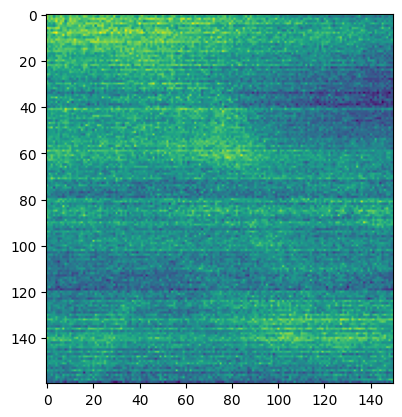

In [111]:
plt.imshow(np.concatenate([b6_image_corrected_2[13240:13320, 2700:2850], b6_image_corrected_2[13320:13400, 2700:2850]]))

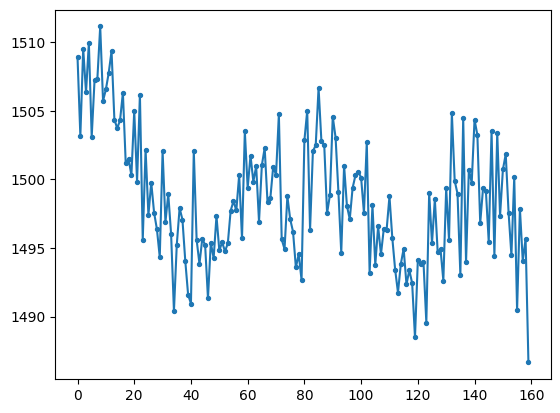

In [104]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected_2[13240:13320, 2700:2850], axis=1), np.mean(b6_image_corrected_2[13320:13400, 2700:2850], axis=1)]))
plt.scatter(np.arange(160), np.concatenate([np.mean(b6_image_corrected_2[13240:13320, 2700:2850], axis=1), np.mean(b6_image_corrected_2[13320:13400, 2700:2850], axis=1)]), s=8)

In [62]:
(np.mean(b6_image_corrected_2[13240:13320, 2700:2850], axis=1)[39],
 np.mean(b6_image_corrected_2[13240:13320, 2700:2850], axis=1)[40],
 np.mean(b6_image_corrected_2[13240:13320, 2700:2850], axis=1)[41])

(1491.5866666666666, 1497.96, 1509.1466666666668)

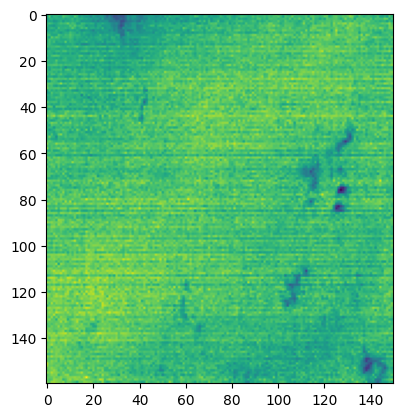

In [119]:
plt.imshow(np.concatenate([b6_image_corrected[360:440, 5100:5250], b6_image_corrected[440:520, 5100:5250]]))

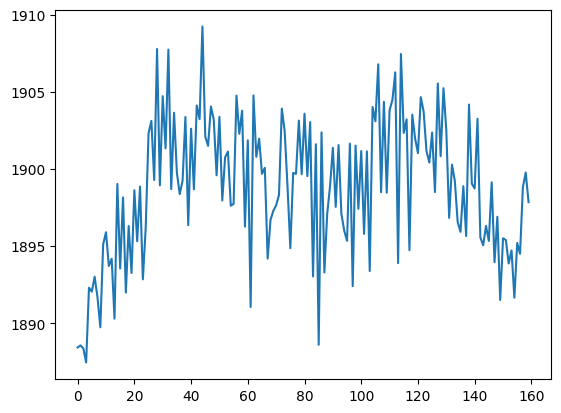

In [506]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected_new[360:440, 5100:5250], axis=1), np.mean(b6_image_corrected_new[440:520, 5100:5250], axis=1)]))

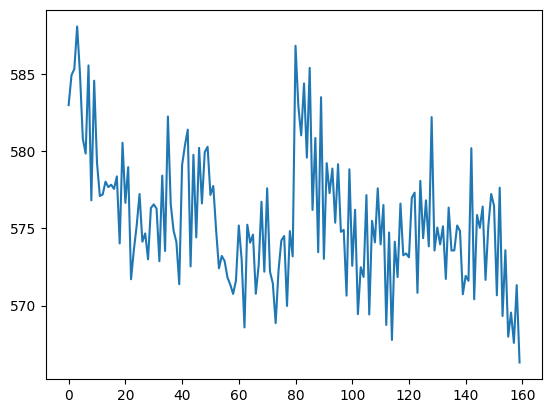

In [254]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected_2[240:320, 800:900], axis=1), np.mean(b6_image_corrected_2[320:400, 800:900], axis=1)]))

In [255]:
(np.concatenate([np.mean(b6_image_corrected_2[240:320, 800:900], axis=1), np.mean(b6_image_corrected_2[320:400, 800:900], axis=1)])[79],
 np.concatenate([np.mean(b6_image_corrected_2[240:320, 800:900], axis=1), np.mean(b6_image_corrected_2[320:400, 800:900], axis=1)])[80])

(573.19, 586.83)

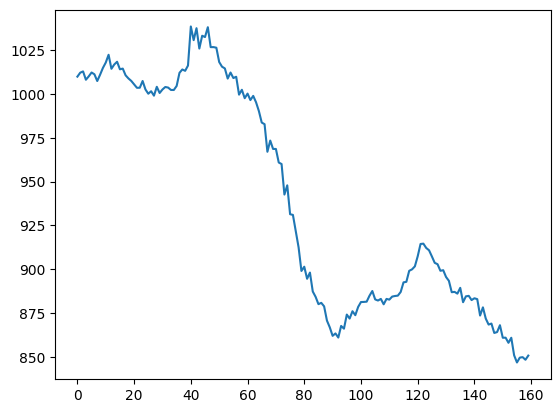

In [256]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[5680:5760, 2580:2650], axis=1), np.mean(b6_image_corrected[5760:5840, 2580:2650], axis=1)]))

In [258]:
(np.concatenate([np.mean(b6_image_corrected[5680:5760, 2580:2650], axis=1), np.mean(b6_image_corrected[5760:5840, 2580:2650], axis=1)])[79],
np.concatenate([np.mean(b6_image_corrected[5680:5760, 2580:2650], axis=1), np.mean(b6_image_corrected[5760:5840, 2580:2650], axis=1)])[80])

(898.9857142857143, 901.4142857142857)

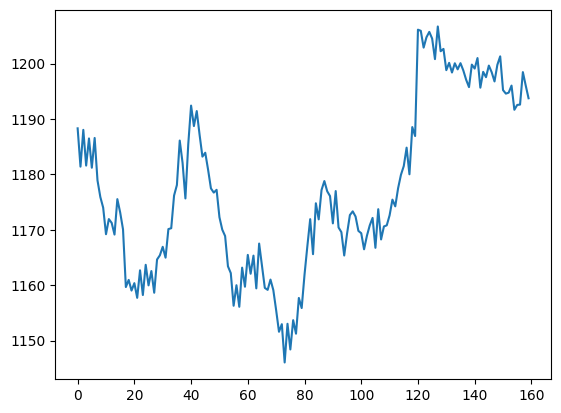

In [259]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[11680:11760, 2940:3100], axis=1), np.mean(b6_image_corrected[11760:11840, 2940:3100], axis=1)]))

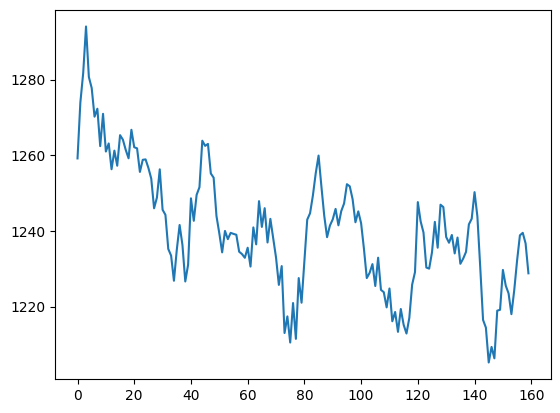

In [260]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[12080:12160, 2830:2950], axis=1), np.mean(b6_image_corrected[12160:12240, 2830:2950], axis=1)]))

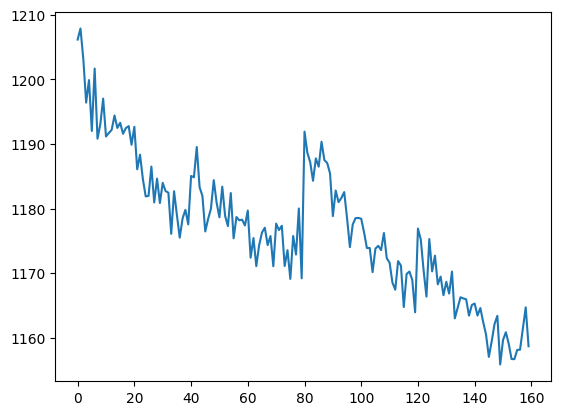

In [261]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[9800:9880, 1900:2100], axis=1), np.mean(b6_image_corrected[9880:9960, 1900:2100], axis=1)]))

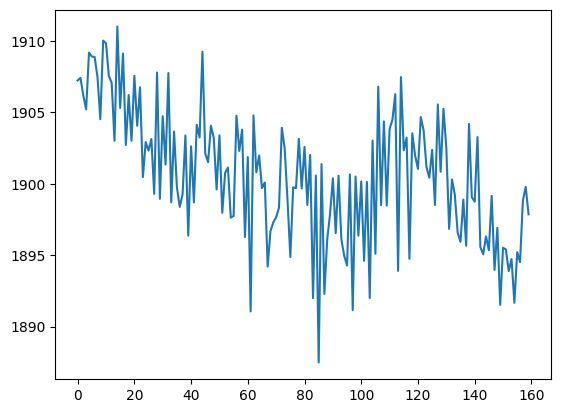

In [418]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[360:440, 5100:5250], axis=1), np.mean(b6_image_corrected[440:520, 5100:5250], axis=1)]))

In [412]:
tmp = np.zeros((80, 150))

In [413]:
tmp = np.vstack([np.repeat(np.repeat(np.arange(20, 7, -1), 2), 150).reshape((26, 150)), np.zeros((80 - 26, 150))])

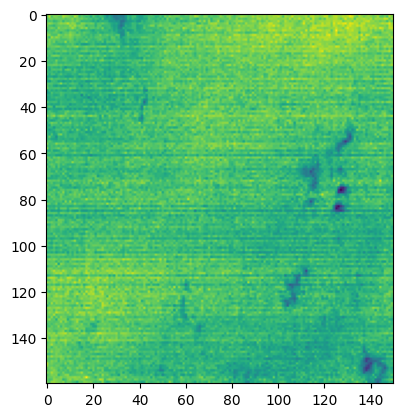

In [419]:
plt.imshow(np.concatenate([b6_image_corrected[360:440, 5100:5250], b6_image_corrected[440:520, 5100:5250] - tmp]))

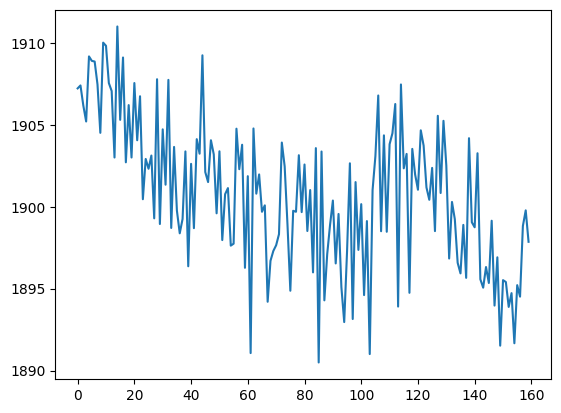

In [320]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[360:440, 5100:5250], axis=1), np.mean(b6_image_corrected[440:520, 5100:5250], axis=1) - tmp]))

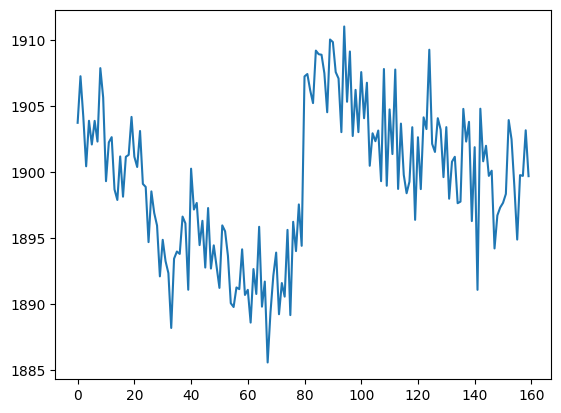

In [199]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[280:360, 5100:5250], axis=1), np.mean(b6_image_corrected[360:440, 5100:5250], axis=1)]))

In [263]:
(np.concatenate([np.mean(b6_image_corrected[280:360, 5100:5250], axis=1), np.mean(b6_image_corrected[360:440, 5100:5250], axis=1)])[79],
 np.concatenate([np.mean(b6_image_corrected[280:360, 5100:5250], axis=1), np.mean(b6_image_corrected[360:440, 5100:5250], axis=1)])[80])

(1894.4, 1907.2266666666667)

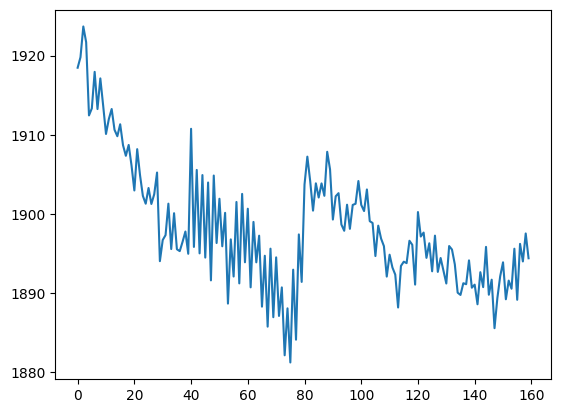

In [201]:
plt.plot(np.arange(160), np.concatenate([np.mean(b6_image_corrected[200:280, 5100:5250], axis=1), np.mean(b6_image_corrected[280:360, 5100:5250], axis=1)]))

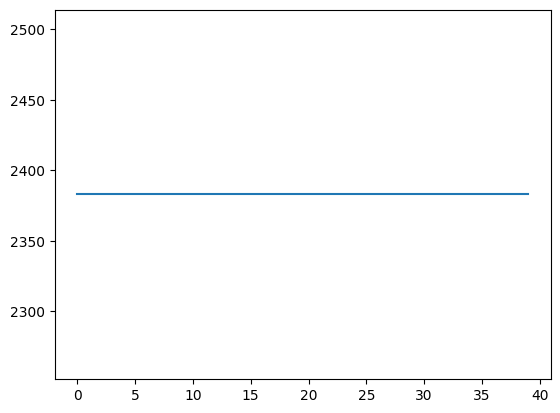

In [13]:
plt.plot(np.arange(40), alpha[0] * np.mean(voc_telemetry_1.b6[2:][::2], axis=(0, 2)) + beta[0])

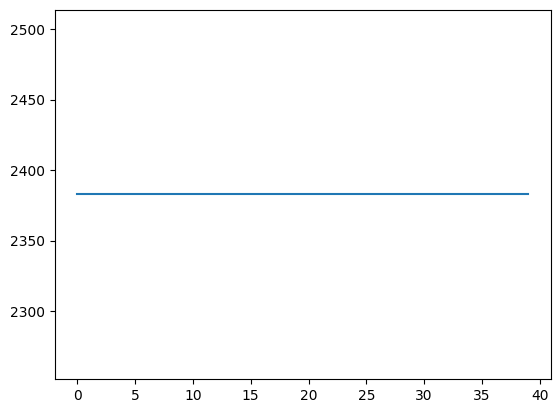

In [42]:
plt.plot(np.arange(40), alpha[1] * np.mean(voc_telemetry_1.b6[2:][1::2], axis=(0, 2)) + beta[1])

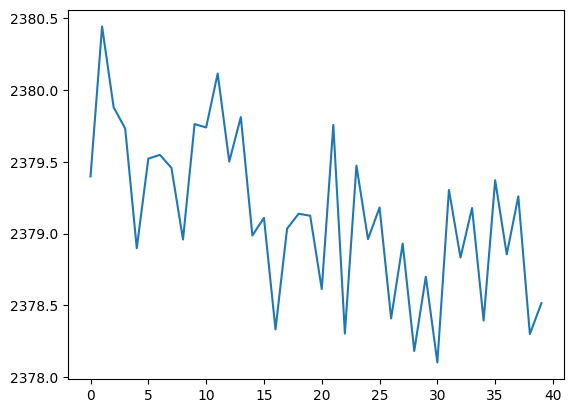

In [16]:
plt.plot(np.arange(40), alpha[1] * np.mean(voc_telemetry_2.b6[2:][0::2], axis=(0, 2)) + beta[1])

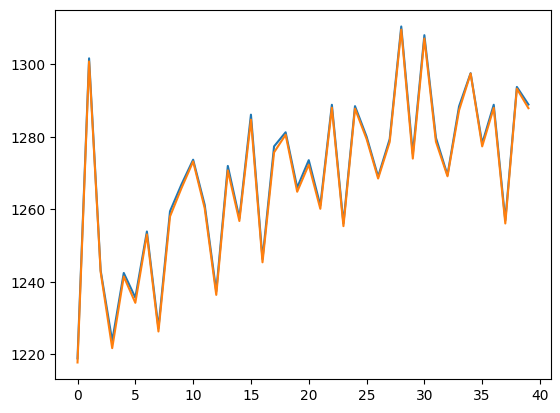

In [208]:
plt.plot(np.arange(40), np.mean(bb_telemetry_1.b6[40:][0::2], axis=(0, 2)))
plt.plot(np.arange(40), np.mean(bb_telemetry_2.b6[40:][1::2], axis=(0, 2)))

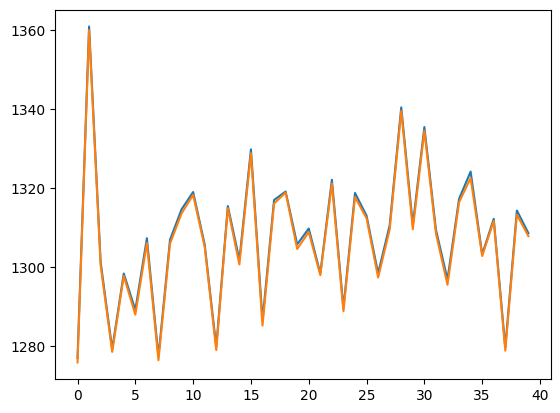

In [209]:
plt.plot(np.arange(40), np.mean(bb_telemetry_1.b6[40:][1::2], axis=(0, 2)))
plt.plot(np.arange(40), np.mean(bb_telemetry_2.b6[40:][0::2], axis=(0, 2)))

In [62]:
revolution_1_mersi_data.metadata[0].scans_type

1

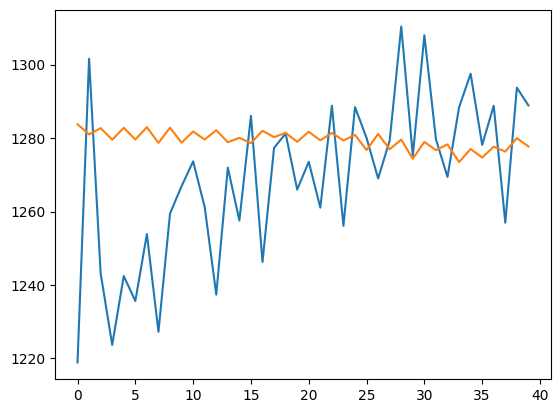

In [60]:
plt.plot(np.arange(40), np.mean(bb_telemetry_1.b6[40:][0::2], axis=(0, 2)))
plt.plot(np.arange(40), alpha[0] * np.mean(bb_telemetry_1.b6[40:][0::2], axis=(0, 2)) + beta[0])
#plt.plot(np.arange(40), alpha[0] * np.mean(bb_telemetry_2.b6[40:][1::2], axis=(0, 2)) + beta[0])

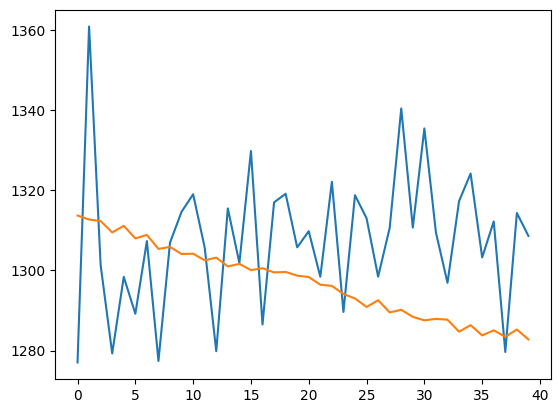

In [61]:
plt.plot(np.arange(40),  np.mean(bb_telemetry_1.b6[40:][1::2], axis=(0, 2)))
plt.plot(np.arange(40), alpha[1] * np.mean(bb_telemetry_1.b6[40:][1::2], axis=(0, 2)) + beta[1])
#plt.plot(np.arange(40), alpha[1] * np.mean(bb_telemetry_2.b6[40:][0::2], axis=(0, 2)) + beta[1])

In [67]:
(np.mean(alpha[0] * np.mean(bb_telemetry_1.b6[40:][0::2], axis=(0, 2)) + beta[0]) + np.mean(alpha[1] * np.mean(bb_telemetry_1.b6[40:][1::2], axis=(0, 2)) + beta[1])) / 2

1288.32704851939

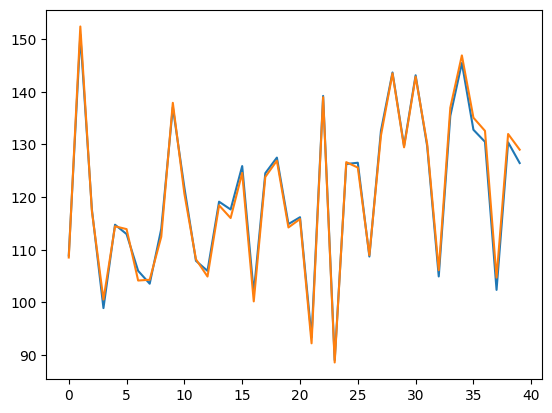

In [66]:
plt.plot(np.arange(40), np.mean(sv_telemetry_1.b6[40:][1::2], axis=(0, 2)))
plt.plot(np.arange(40), np.mean(sv_telemetry_1.b6[40:][0::2], axis=(0, 2)))

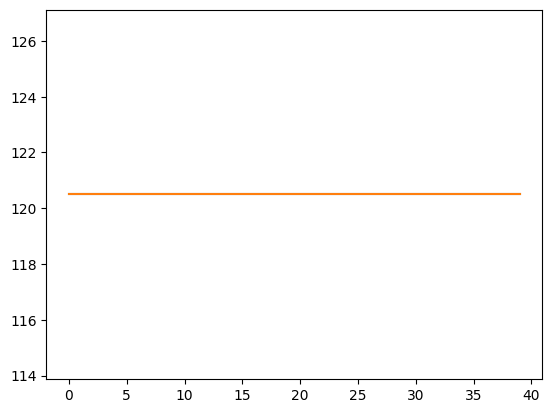

In [65]:
plt.plot(np.arange(40), alpha[1] * np.mean(sv_telemetry_1.b6[40:][1::2], axis=(0, 2)) + beta[1])
plt.plot(np.arange(40), alpha[0] * np.mean(sv_telemetry_1.b6[40:][0::2], axis=(0, 2)) + beta[0])

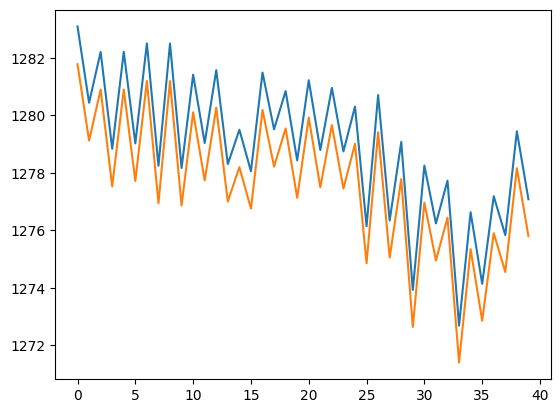

In [168]:
plt.plot(np.arange(40), alpha[0] * np.mean(bb_telemetry_1.b6[2:][0::2], axis=(0, 2)) + beta[0])
plt.plot(np.arange(40), (alpha[1] * np.mean(bb_telemetry_1.b6[2:][1::2], axis=(0, 2)) + beta[1]) * ((bb_1 / bb_2) - 0.001))

In [106]:
bb_1 = alpha[0] * np.mean(bb_telemetry_1.b6[2:][0::2], axis=(0, 2)) + beta[0]
bb_2 = alpha[1] * np.mean(bb_telemetry_1.b6[2:][1::2], axis=(0, 2)) + beta[1]

In [138]:
bb_1 / bb_2

array([0.97701868, 0.97582653, 0.97738561, 0.97694426, 0.97826593,
       0.97837528, 0.98015809, 0.97961492, 0.98249868, 0.980619  ,
       0.98292247, 0.98236896, 0.98387747, 0.98301076, 0.9833904 ,
       0.98348105, 0.98569509, 0.98502307, 0.98585483, 0.98481517,
       0.98730005, 0.98680184, 0.9886426 , 0.98852115, 0.99062176,
       0.98894509, 0.99124465, 0.99025976, 0.99174324, 0.98929695,
       0.99305926, 0.99140564, 0.99268525, 0.99119439, 0.99290179,
       0.99302182, 0.99422209, 0.99448953, 0.99585373, 0.99595835])

In [104]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression().fit(bb_2.reshape((-1, 1)), bb_1)

In [127]:
model.intercept_

1027.8779020018123

In [175]:
alpha_3 = np.vstack([np.ones(40), (bb_1 / bb_2) - 0.001])
beta_3 = np.vstack([np.zeros(40), np.zeros(40)])

In [176]:
b6_image_corrected_new = relative_calibration.apply_coeff_for_image(b6_image_corrected, alpha_3, beta_3, revolution_1_mersi_data.metadata[0].scans_type)

In [96]:
sv_b6_corrected = relative_calibration.apply_coeff_for_telemetry(sv_telemetry_1.b6, alpha, beta, revolution_1_mersi_data.metadata[0].scans_type)
bb_b6_corrected = relative_calibration.apply_coeff_for_telemetry(bb_telemetry_1.b6, alpha, beta, revolution_1_mersi_data.metadata[0].scans_type)
voc_b6_corrected = relative_calibration.apply_coeff_for_telemetry(voc_telemetry_1.b6, alpha, beta, revolution_1_mersi_data.metadata[0].scans_type)

In [149]:
plt.imsave('b6_test.png', b6_image_corrected_new)

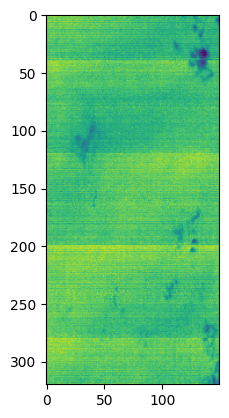

In [190]:
plt.imshow(b6_image_corrected[240:560, 5100:5250])